**Stock Price Prediction Using LSTM Model**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf

In [2]:
# Load the dataset (provide a direct link to the dataset)
df = pd.read_csv('/content/AAPL.csv')

# Display the first few rows of the dataset
print("Initial dataset:")
print(df.head())

Initial dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


**Cleaning Data**

In [3]:
duplicate_dates = df[df.duplicated(subset='Date')]
print("Duplicate Dates:")
print(duplicate_dates)

# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

Duplicate Dates:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Checking for missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Exploratory Data Analysis (EDA)**

In [4]:
# Convert 'Date' column to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

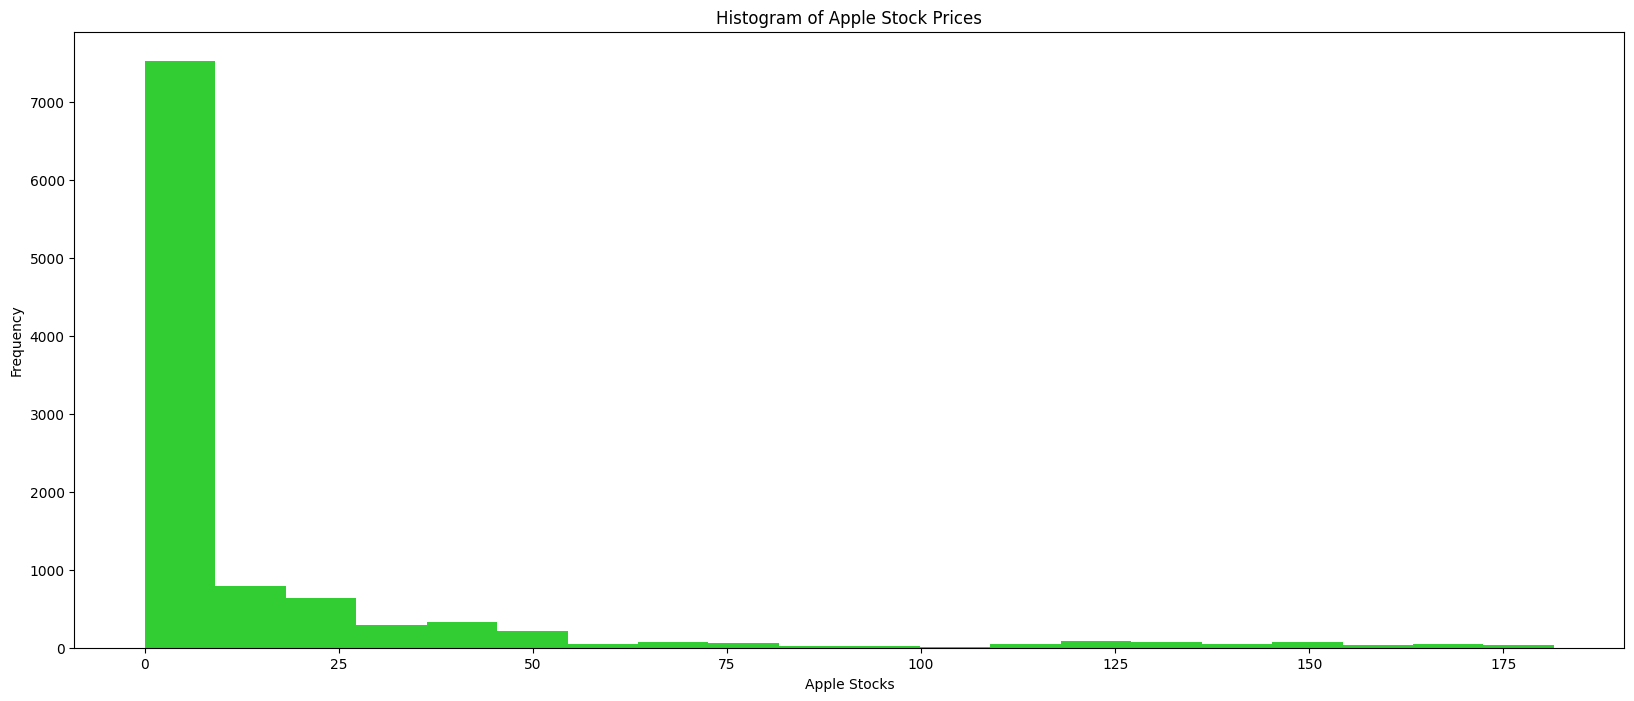

In [5]:
# Plotting Histogram
plt.figure(figsize=(20, 8))
plt.hist(df['Adj Close'], bins=20, color='LimeGreen')
plt.title('Histogram of Apple Stock Prices')
plt.xlabel('Apple Stocks')
plt.ylabel('Frequency')
plt.show()

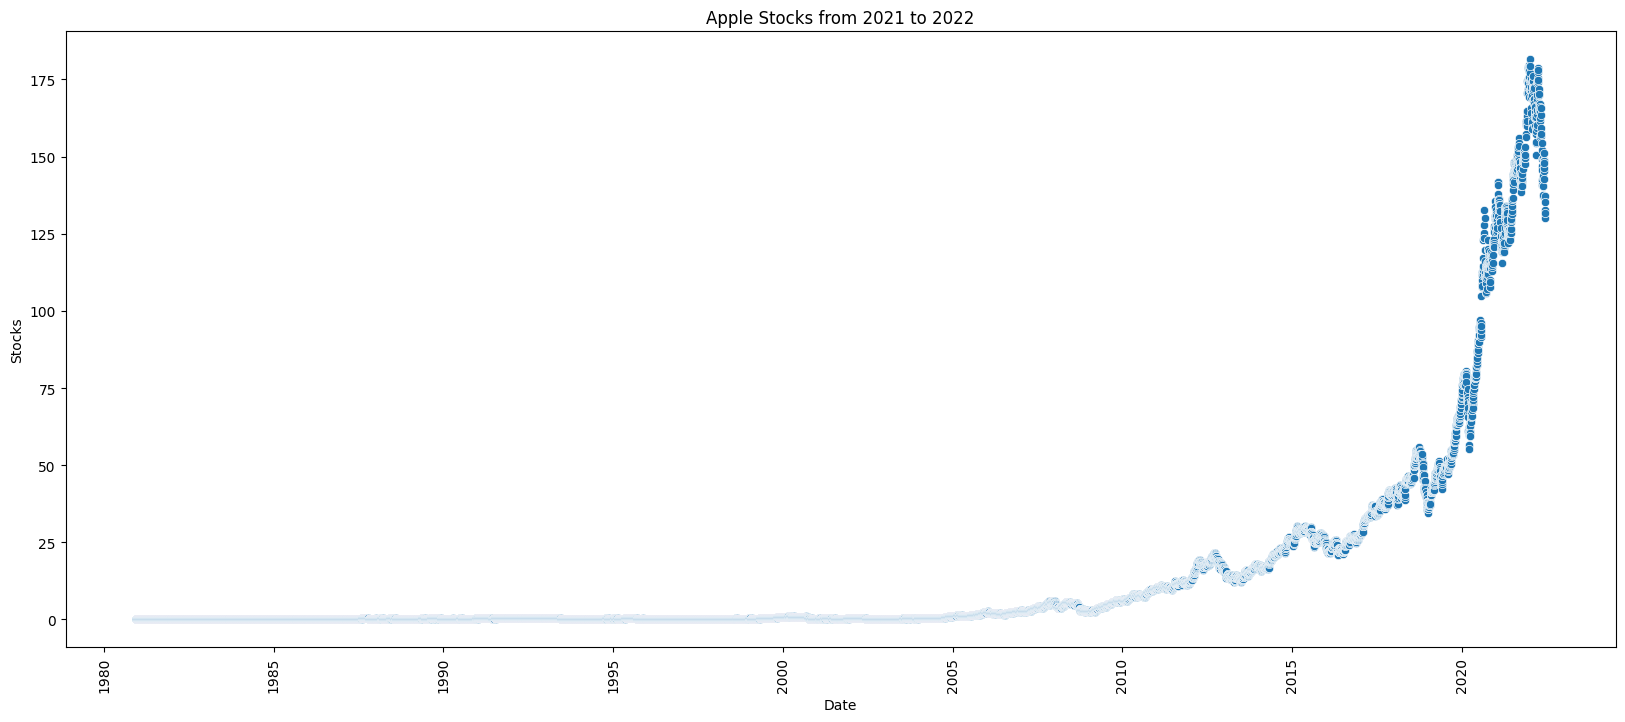

In [6]:
plt.figure(figsize=(20, 8))
sns.scatterplot(df['Adj Close'])
plt.title('Apple Stocks from 2021 to 2022')
plt.ylabel('Stocks')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

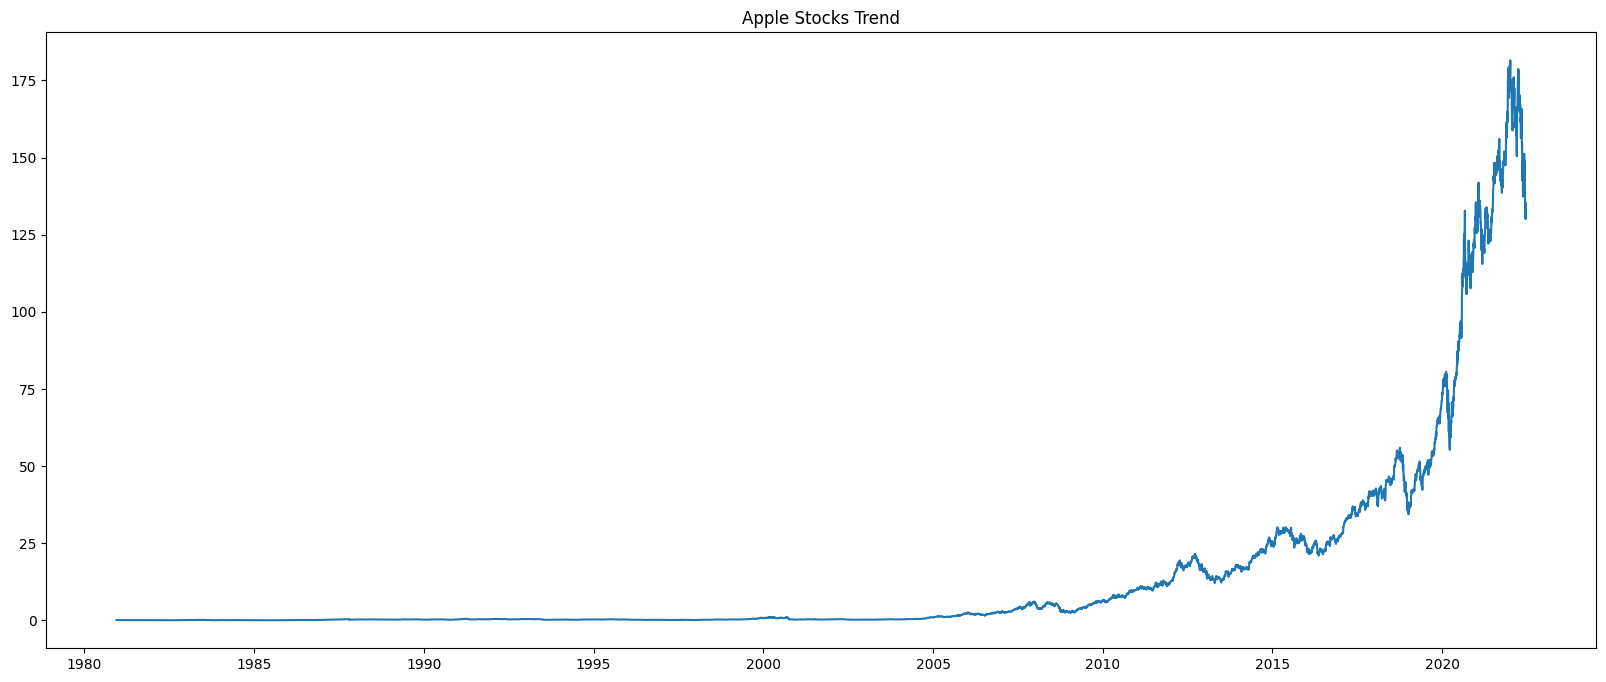

In [7]:
# Plotting Time Series Trend
plt.figure(figsize=(20, 8))
plt.plot(df['Adj Close'])
plt.title('Apple Stocks Trend')
plt.show()

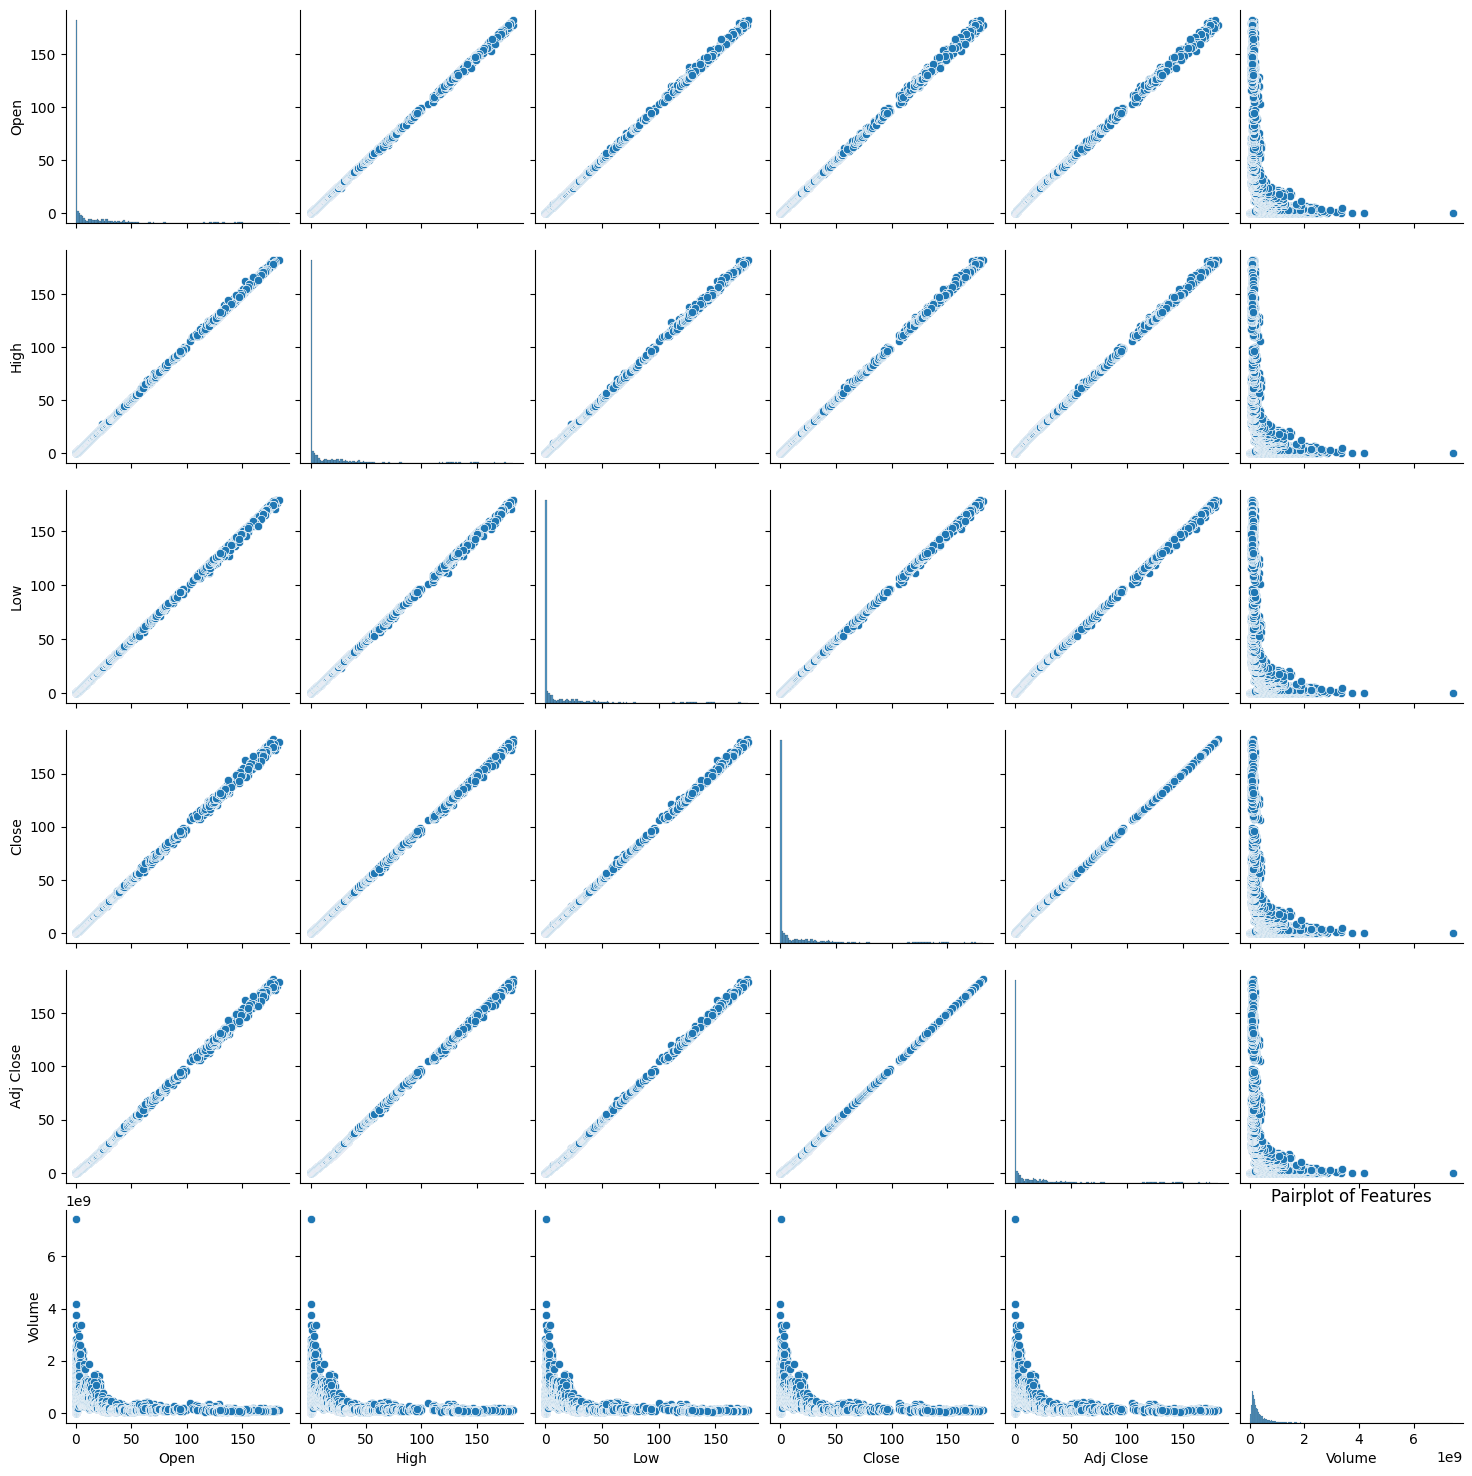

In [8]:
# Pairplot to visualize relationships between different features
sns.pairplot(df)
plt.title('Pairplot of Features')
plt.show()

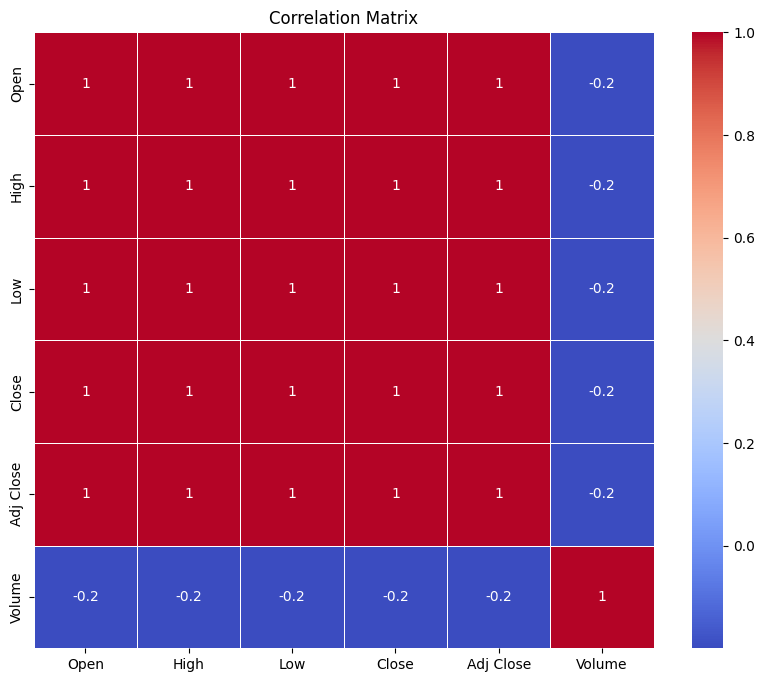

In [9]:
# Correlation matrix to identify linear relationships
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Modelling And Creating and Preparing the training Dataset**

In [10]:
# Extract the 'Close' column for further analysis
closing_prices = df.filter(['Close']).values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

# Create training dataset
train_data = scaled_prices[:int(len(scaled_prices) * 0.95), :]
train_features, train_labels = [], []

# Prepare training data
for i in range(60, len(train_data)):
  train_features.append(train_data[i-60:i, 0])
  train_labels.append(train_data[i, 0])

train_features, train_labels = np.array(train_features), np.array(train_labels)

# Reshape the data for LSTM
train_features = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))

**Building The LSTM Model**

In [12]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
model.fit(train_features, train_labels, epochs=25, batch_size=32)

# Create the testing dataset
test_data = scaled_prices[int(len(scaled_prices) * 0.95) - 60:, :]
x_test, y_test = [], closing_prices[int(len(closing_prices) * 0.95):, :]

# Prepare testing data
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/25
309/309 [==============================] - 39s 99ms/step - loss: 1.6076e-04
Epoch 2/25
309/309 [==============================] - 41s 132ms/step - loss: 3.8026e-05
Epoch 3/25
309/309 [==============================] - 39s 126ms/step - loss: 3.2310e-05
Epoch 4/25
309/309 [==============================] - 30s 96ms/step - loss: 2.5633e-05
Epoch 5/25
309/309 [==============================] - 29s 95ms/step - loss: 1.8413e-05
Epoch 6/25
309/309 [==============================] - 29s 95ms/step - loss: 2.4001e-05
Epoch 7/25
309/309 [==============================] - 30s 96ms/step - loss: 2.1544e-05
Epoch 8/25
309/309 [==============================] - 32s 103ms/step - loss: 1.5103e-05
Epoch 9/25
309/309 [==============================] - 30s 97ms/step - loss: 1.6367e-05
Epoch 10/25
309/309 [==============================] - 36s 117ms/step - loss: 1.5427e-05
Epoch 11/25
309/309 [==============================] - 28s 91ms/step - loss: 1.5098e-05
Epoch 12/25
309/309 [================

**Visualizing the results**

In [13]:
training_set = df.iloc[:int(len(closing_prices) * 0.95)]
validation_set = df.iloc[int(len(closing_prices) * 0.95):]
validation_set.loc[:, 'Predictions'] = predictions.copy()

<ipython-input-13-50aa65072847>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set.loc[:, 'Predictions'] = predictions.copy()


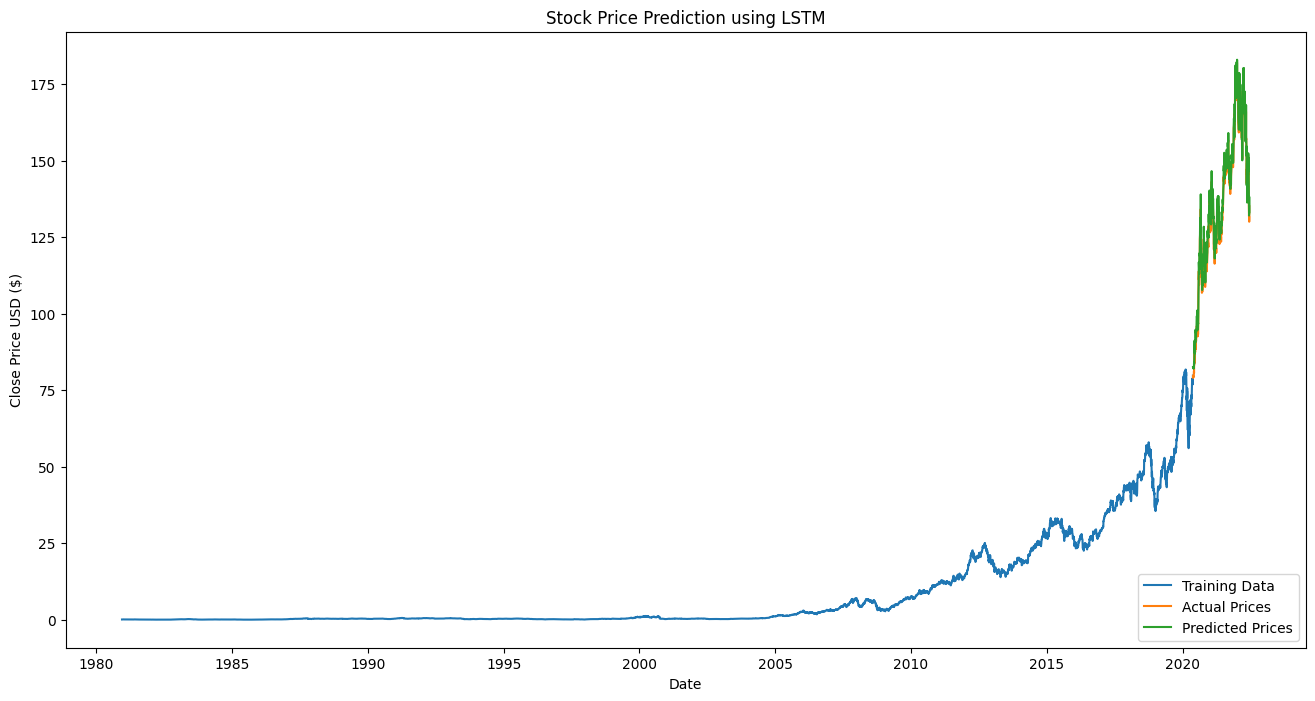

In [14]:
# Visualize the predicted prices compared to actual prices
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(training_set['Close'], label='Training Data')
plt.plot(validation_set[['Close', 'Predictions']], label=['Actual Prices', 'Predicted Prices'])
plt.legend(loc='lower right')
plt.show()

**Evaluation and Final Result**

In [15]:
# Model Evaluation Metrics
mse_lstm = mean_squared_error(validation_set['Close'], validation_set['Predictions'])
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(validation_set['Close'], validation_set['Predictions'])
mape_lstm = np.mean(np.abs((validation_set['Close'] - validation_set['Predictions']) / validation_set['Close'])) * 100
r2_lstm = r2_score(validation_set['Close'], validation_set['Predictions'])

print('\nLSTM Model Evaluation:')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'R2 Score: {r2_lstm:.2f}')

# Additional Insights
start_date_predictions = validation_set.index[0]
print(f'The LSTM model predictions start from {start_date_predictions}')


LSTM Model Evaluation:
MSE: 13.17
RMSE: 3.63
MAE: 2.98
MAPE: 2.28%
R2 Score: 0.98
The LSTM model predictions start from 2020-05-21 00:00:00


**Stock Price Prediction Using Decision Tree Regression**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
df = pd.read_csv('/content/AAPL.csv')

In [18]:
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [20]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

             Volume  
count  1.046800e+04  
mean   3.308489e+08  
std    3.388418e+08  
min    0.000000e+00  
25%    1.237768e+08  
50%    2.181592e+08  
75%    4.105794e+08  
max    7.421641e+09

In [21]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
10463  122207100  
10464   84784300  
10465   91533000  
10466  108123900  
10467  134118500

In [24]:
del df['Adj Close']

In [26]:
df.shape

(10468, 6)

**Exploratory Data Analysis (EDA)**

<Axes: xlabel='Open', ylabel='Count'>

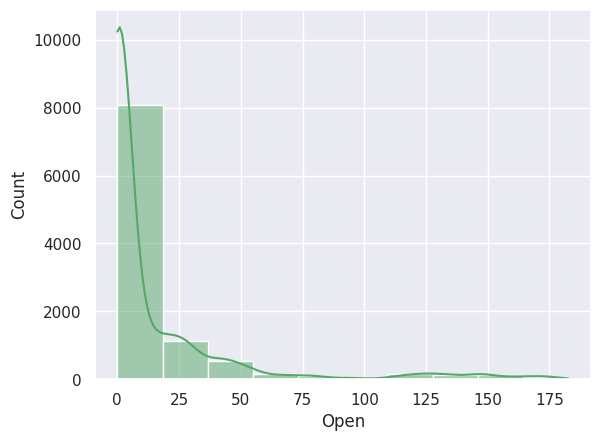

In [28]:
# plot the histogram for analysis 'Open' Stock price

f, ax = plt.subplots(1,1)

sns.set(style='darkgrid')
sns.histplot(data = df, x = "Open", color='g', bins=10, kde = True, legend=False)

<Axes: xlabel='Close', ylabel='Count'>

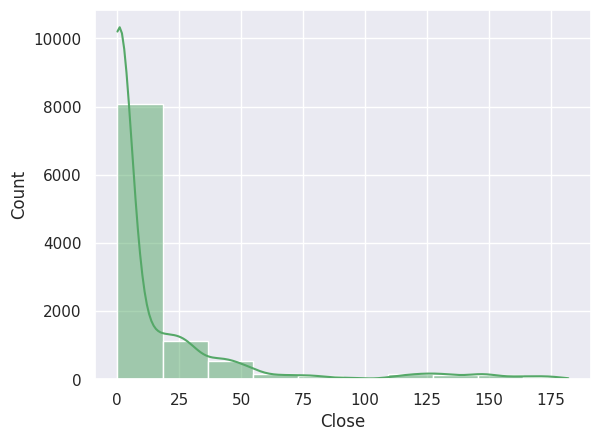

In [29]:
# plot the histogram for analysis 'Close' Stock price

f, ax = plt.subplots(1,1)

sns.set(style='darkgrid')
sns.histplot(data = df, x = "Close", color='g', bins=10, kde = True, legend=False)

In [30]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [31]:
fig = px.box(df, x = "Date", y = "Open", points = 'all')
fig.show()

In [32]:
fig = px.box(df, x = "Date", y = "Close", points = False)
fig.show()

In [33]:
X = df[['Open']]
Y = df[['Close']]

In [34]:
# Printing the start date and End date of the stock price

start_date = df.iloc[0][0]
end_date = df.iloc[-1][0]

print('Starting Date',start_date)
print('Ending Date',end_date)

Starting Date 1980-12-12
Ending Date 2022-06-17


In [35]:
df

Date        Open        High         Low       Close     Volume
0      1980-12-12    0.128348    0.128906    0.128348    0.128348  469033600
1      1980-12-15    0.122210    0.122210    0.121652    0.121652  175884800
2      1980-12-16    0.113281    0.113281    0.112723    0.112723  105728000
3      1980-12-17    0.115513    0.116071    0.115513    0.115513   86441600
4      1980-12-18    0.118862    0.119420    0.118862    0.118862   73449600
...           ...         ...         ...         ...         ...        ...
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  122207100
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995   84784300
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993   91533000
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  108123900
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  134118500

[10468 rows x 6 columns]

**Analysis stock price from start**

In [36]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_1985 = df.loc[(df['Date'] >= '1985-01-01')
                     & (df['Date'] < '2022-06-17')]

y_1985.drop(y_1985[['Volume']],axis=1)

Date        Open        High         Low       Close
1025  1985-01-02    0.130022    0.130022    0.124442    0.124442
1026  1985-01-03    0.126674    0.130022    0.126674    0.126674
1027  1985-01-04    0.126674    0.127232    0.125000    0.126674
1028  1985-01-07    0.126674    0.127232    0.126116    0.126116
1029  1985-01-08    0.126116    0.127232    0.125000    0.125000
...          ...         ...         ...         ...         ...
10462 2022-06-10  140.279999  140.759995  137.059998  137.130005
10463 2022-06-13  132.869995  135.199997  131.440002  131.880005
10464 2022-06-14  133.130005  133.889999  131.479996  132.759995
10465 2022-06-15  134.289993  137.339996  132.160004  135.429993
10466 2022-06-16  132.080002  132.389999  129.039993  130.059998

[9442 rows x 5 columns]

In [37]:
monthvise = y_1985.groupby(y_1985['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open      Close
Date                           
January    16.410946  16.402074
February   16.948111  16.959779
March      16.987988  17.004753
April      17.177601  17.168122
May        16.788226  16.800486
June       15.820105  15.825411
July       14.700805  14.726156
August     15.562641  15.589503
September  16.099732  16.046689
October    15.840495  15.851496
November   16.441251  16.461246
December   17.294887  17.305731

In [38]:
monthvise.isnull().sum()

Open     0
Close    0
dtype: int64

**Analysis of 2017 year**

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2017 = df.loc[(df['Date'] >= '2017-09-03')
                     & (df['Date'] < '2018-12-12')]

y_2017.drop(y_2017[['Volume']],axis=1)

Date       Open       High        Low      Close
9262 2017-09-05  40.937500  41.062500  40.139999  40.520000
9263 2017-09-06  40.677502  40.747501  40.130001  40.477501
9264 2017-09-07  40.522499  40.560001  40.090000  40.314999
9265 2017-09-08  40.215000  40.287498  39.632500  39.657501
9266 2017-09-11  40.125000  40.512501  39.972500  40.375000
...         ...        ...        ...        ...        ...
9577 2018-12-04  45.237499  45.597500  44.067501  44.172501
9578 2018-12-06  42.939999  43.695000  42.605000  43.680000
9579 2018-12-07  43.372501  43.622501  42.075001  42.122501
9580 2018-12-10  41.250000  42.522499  40.832500  42.400002
9581 2018-12-11  42.915001  42.947498  41.750000  42.157501

[320 rows x 5 columns]

In [40]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open      Close
Date                           
January    43.505357  43.501309
February   41.819079  41.909737
March      43.761786  43.624048
April      42.441310  42.458572
May        46.239091  46.384204
June       47.180119  47.155357
July       47.549048  47.577857
August     53.121739  53.336522
September  47.510987  47.417895
October    47.496833  47.507944
November   45.538750  45.455238
December   43.093846  43.084423

In [41]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Open'],
    name = 'Stock Open Price',
    marker_color = 'crimson'
))
fig.add_trace(go.Bar(
    x = monthvise.index,
    y = monthvise['Close'],
    name = 'Stock Close Price',
    marker_color = 'lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [42]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [43]:
# import itertools library
from itertools import cycle

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Overall Analysis from 1980 - 2022**

In [44]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '1980-12-12')
                     & (df['Date'] <= '2022-06-17')]

y_overall.drop(y_overall[['Volume']],axis=1)

Date        Open        High         Low       Close
0     1980-12-12    0.128348    0.128906    0.128348    0.128348
1     1980-12-15    0.122210    0.122210    0.121652    0.121652
2     1980-12-16    0.113281    0.113281    0.112723    0.112723
3     1980-12-17    0.115513    0.116071    0.115513    0.115513
4     1980-12-18    0.118862    0.119420    0.118862    0.118862
...          ...         ...         ...         ...         ...
10463 2022-06-13  132.869995  135.199997  131.440002  131.880005
10464 2022-06-14  133.130005  133.889999  131.479996  132.759995
10465 2022-06-15  134.289993  137.339996  132.160004  135.429993
10466 2022-06-16  132.080002  132.389999  129.039993  130.059998
10467 2022-06-17  130.070007  133.080002  129.809998  131.559998

[10468 rows x 5 columns]

In [45]:
monthvise = y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open      Close
Date                           
January    14.850122  14.842134
February   15.339262  15.349828
March      15.340098  15.355185
April      15.566919  15.558388
May        15.229152  15.240276
June       14.417663  14.424042
July       13.289663  13.312471
August     14.046364  14.070591
September  14.525162  14.477264
October    14.327148  14.337092
November   14.823220  14.841222
December   15.381761  15.391395

In [47]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Splitting the data**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

x_train: (8374, 1)
x_test:  (2094, 1)
y_train: (8374, 1)
y_test:  (2094, 1)


**Training the Model**

In [50]:
clf = tree.DecisionTreeRegressor()

In [51]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [52]:
# prediction of the test data

predict = clf.predict(x_test)
predict

array([88.019997  ,  6.610357  , 37.064999  , ...,  0.257679  ,
        0.36150112,  3.478571  ])

In [53]:
# evaluating score

clf.score(x_test, y_test)

0.9993831878166215

**Evaluating the model**

In [54]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(predict, y_test))

0.24356659896191468


In [55]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(predict, y_test))

0.6486081764777597


In [56]:
from sklearn.metrics import mean_squared_error
import math

# print(mean_squared_error(predict, y_test, squared = False))
print(math.sqrt(mean_squared_error(y_test, predict)))

0.805362139958019


In [57]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, predict,squared = False)

0.014838447427437706

In [58]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predict)
print(r2)

0.9993831878166215


In [59]:
n=150
k=60

r2 = r2_score(y_test, predict)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9989673593783888


**Price Prediction Using SVD Model**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [61]:
df = pd.read_csv('/content/AAPL.csv')
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


**Data Preprocessing**

In [63]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [64]:
del df['Adj Close']

In [65]:
df.head()

Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600

In [66]:
df.shape

(10468, 6)

In [67]:
X = df[['Open','High','Low']]
Y = df['Close']

**Exploratory Data Analysis (EDA)**

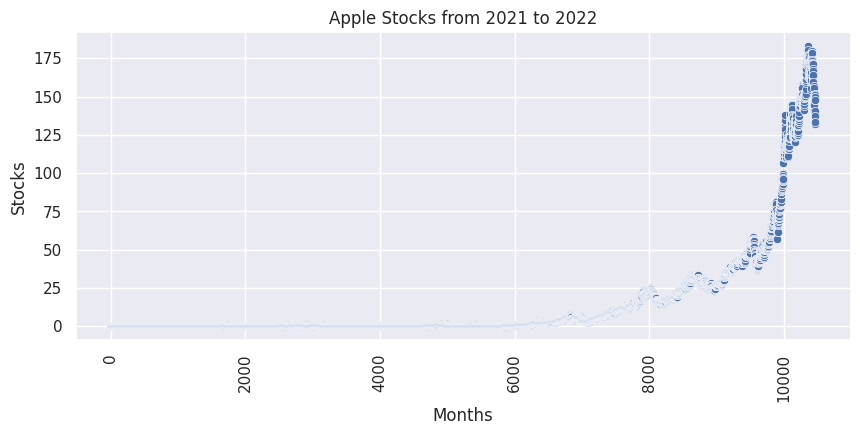

In [69]:
plt.figure(figsize=(10, 4))

sns.scatterplot(df['High']);
plt.title('Apple Stocks from 2021 to 2022');
plt.ylabel('Stocks');
plt.xlabel('Months');
plt.xticks(rotation=90)
plt.show()

<Axes: >

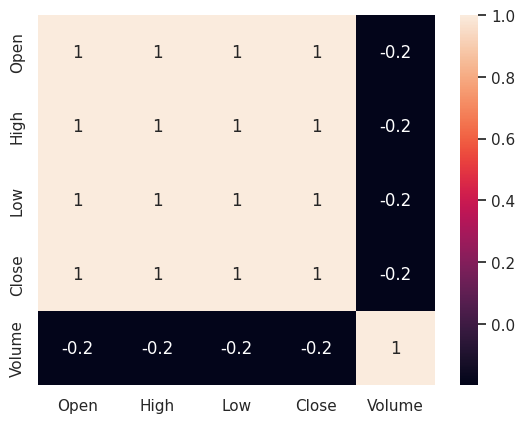

In [71]:
# Convert 'Date' column to datetime object if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Calculate correlations on numerical columns only
sns.heatmap(df.corr(), annot=True)

**Splitting the Data**

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [73]:
print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

x_train: (7327, 3)
x_test:  (3141, 3)
y_train: (7327,)
y_test:  (3141,)


**Training the Model**

In [74]:
from sklearn.svm import SVR
model = SVR()

In [75]:
model.fit(x_train, y_train)

SVR()

In [76]:
model.score(x_test, y_test)

0.9981438227511318

In [77]:
predict = model.predict(x_test)
predict

array([156.82688104,   0.6098449 ,  51.29321381, ...,   0.43537021,
         0.36838879,   5.04596814])

**Evaluating the model**

In [78]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(predict, y_test))

0.27005904372655465


In [79]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predict))

1.9439158686468807


In [80]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_test, predict,squared=False)

0.04881695654426056

In [81]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predict)
print(r2)

0.9981438227511318


In [82]:
n = 60
k = 10

r2 = r2_score(y_test, predict)  #r2 = r square score

adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9977650110676893


**Random Forest Classifier**

In [124]:
pip install pandas numpy scikit-learn

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/AAPL.csv')

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.fillna(method='ffill', inplace=True)

In [126]:
# Define a function to calculate the Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data['Adj Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calculate exponential moving averages (EMA)
df['12 Day EMA'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
df['26 Day EMA'] = df['Adj Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD and MACD Signal Line
df['MACD'] = df['12 Day EMA'] - df['26 Day EMA']
df['MACD Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Bollinger Bands
df['20 Day MA'] = df['Adj Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Adj Close'].rolling(window=20).std()
df['Upper Band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['20 Day MA'] - (df['20 Day STD'] * 2)

# Calculate RSI
df['14 Day RSI'] = calculate_rsi(df, 14)

# Drop rows with NaN values (mainly from new indicators)
df.dropna(inplace=True)

In [131]:
# Define features and target
features = ['12 Day EMA', '26 Day EMA', 'MACD', 'MACD Signal Line', 'Upper Band', 'Lower Band', '14 Day RSI']
target = 'Target'

# Define the target column
df['Target'] = df['Adj Close'].shift(-1) > df['Adj Close']
df['Target'] = df['Target'].astype(int)
df.dropna(inplace=True)

In [133]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [134]:
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [136]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [137]:
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.4727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.83      0.60       984
           1       0.51      0.16      0.24      1106

    accuracy                           0.47      2090
   macro avg       0.49      0.49      0.42      2090
weighted avg       0.49      0.47      0.41      2090

Confusion Matrix:
 [[813 171]
 [931 175]]


**ARIMA And XGBoost**

In [138]:
import pandas as pd

df = pd.read_csv('/content/AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

**ARIMA Model**

In [139]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'Close' is the column with the stock prices
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=30)
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10468
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10997.470
Date:                Tue, 18 Jun 2024   AIC                          22006.940
Time:                        18:43:36   BIC                          22050.475
Sample:                             0   HQIC                         22021.643
                              - 10468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0586      0.002    -25.659      0.000      -0.063      -0.054
ar.L2         -0.0101      0.002     -4.596      0.000      -0.014      -0.006
ar.L3         -0.0343      0.003    -13.679      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



**XGBoost**

In [140]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
df['Prediction'] = df['Close'].shift(-30)
X = df[['Close']].values[:-30]
y = df['Prediction'].values[:-30]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [142]:
# Predictions
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

MSE: 3813.8048103689716
